In [2]:
from illustris import getGalaxy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from __future__ import division
%matplotlib inline
pi=np.pi

In [3]:
# Getting data from a particular galaxy (from online)

# Here we pick which kinds of particles we want (0-gas, 4-stars)
# and what information about them 
# (see http://www.illustris-project.org/data/docs/specifications/)
fields=[
    [4,'Coordinates'],
    [4,'Velocities'],
    [4,'Masses'],
    [0,'Coordinates'],
    [0,'Velocities'],
    [0,'Masses'],
    
]

# Spiral: 15, 300122
# Elliptical: 342260, 382533
# ???: 177131, 200655, 204394, 268841, 273742, 278699, 311141

# Here we actually pull the data from online
data=getGalaxy(15,fields)

# And here we put it into simple numpy arrays to work with
rStar=data[0][:,:]
vStar=data[1][:,:]
mStar=data[2][:]
rGas=data[3][:,:]
vGas=data[4][:,:]
mGas=data[5][:]

In [4]:
# A few useful functions to build from

# given the position and masses of the stars finds their center of mass
def findCenterMass(rStar,mStar):
    com=np.zeros(3)
    for i in range(3):
        com[i]=np.sum(rStar[:,i]*mStar[:])/np.sum(mStar[:])
    return com



# given the position and masses of the stars, some number of pixels and some distance finds
# the projected total mass
def findPixels(rStar,mStar,nPixels,span):
    pixels=np.zeros((nPixels,nPixels))
    for i in range(nPixels):
        for j in range(nPixels):
            inPix=np.argwhere((span*(((2*i)/nPixels)-1)<rStar[:,0])
                            &(span*(((2*j)/nPixels)-1)<rStar[:,2])
                         &(span*(((2*(i+1))/nPixels)-1)>rStar[:,0])
                         &(span*(((2*(j+1))/nPixels)-1)>rStar[:,2]))
            if inPix.size==0:
                continue
            pixels[i,j]=np.sum(mStar[inPix])
    return pixels

def findPixelsVel(rStar,vStar,nPixels,span):
    pixels=np.zeros((nPixels,nPixels))
    for i in range(nPixels):
        for j in range(nPixels):
            inPix=np.argwhere((span*(((2*i)/nPixels)-1)<rStar[:,0])
                            &(span*(((2*j)/nPixels)-1)<rStar[:,2])
                         &(span*(((2*(i+1))/nPixels)-1)>rStar[:,0])
                         &(span*(((2*(j+1))/nPixels)-1)>rStar[:,2]))
            if inPix.size==0:
                continue
            pixels[i,j]=np.sum(vStar[inPix])
    return pixels

In [5]:
# Moving all the co-ordinates such that the galaxy's centered on (0,0,0)

nStar=len(mStar)
com1=findCenterMass(rStar,mStar) # finds the center of mass
rStar=rStar-com1 # recenters all positions around the center of mass
com2=findCenterMass(vStar,mStar)
vStar=vStar-com2

# Finding and plotting the density profile

# finds the distance between every particle and the origin
rSquared=np.zeros(nStar)
for i in range(3):
    rSquared+=rStar[:,i]**2
r=np.sqrt(rSquared) 

# finds all particles in each of a series of radial bins,
# finds the total mass in that bin and divides by the volume
nBins=16
rMax=16
rBins=np.linspace(0,rMax,nBins+1)
density=np.zeros(nBins)
for i in range(nBins):
    inBin=np.argwhere((r>rBins[i]) & (r<rBins[i+1]))
    if inBin.size==0:
        continue
    density[i]=np.sum(mStar[inBin])/(4*np.pi*(np.power(rBins[i+1],3) - np.power(rBins[i],3))/3)

# plots the denisty
densPlot=plt.gca()
densPlot.semilogy(rBins[:-1],density)
densPlot.set_ylabel('Density')
densPlot.set_xlabel('Radius')
plt.show(densPlot)

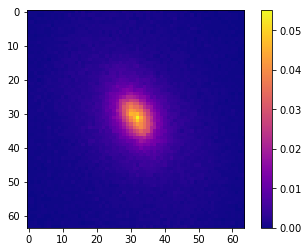

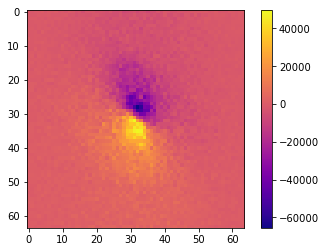

In [6]:
# Making a simple image of the galaxy

pixels=findPixels(rStar,mStar,64,16)
galaxyPlot=plt.gca()
image=galaxyPlot.imshow(pixels,cmap='plasma')
plt.colorbar(image)
plt.show(galaxyPlot)

# Making a image of the velocity of the stars in the galaxy

pixels=findPixelsVel(rStar,vStar,64,16)
galaxyPlot=plt.gca()
image=galaxyPlot.imshow(pixels,cmap='plasma')
plt.colorbar(image)
plt.show(galaxyPlot)

x=0
y=pi/2
z=0

rz=np.array([[np.cos(z), -np.sin(z), 0], [np.sin(z), np.cos(z), 0], [0, 0, 1]])
ry=np.array([[np.cos(y), 0, np.sin(y)], [0, 1, 0], [-np.sin(y), 0, np.cos(y)]])
rx=np.array([[1, 0, 0], [0, np.cos(x), -np.sin(x)], [0, np.sin(x), np.cos(x)]])
T = np.dot(np.dot(rz,ry),rx)
rStarNew = np.transpose(T.dot(np.transpose(rStar)))

pixels=findPixelsVel(rStarNew,vStar,64,16)
galaxyPlot=plt.gca()
image=galaxyPlot.imshow(pixels,cmap='plasma')
plt.colorbar(image)
plt.show(galaxyPlot)

nGas=len(mGas)
com_2=findCenterMass(rGas,mGas) # finds the center of mass
rGas=rGas-com_2 # recenters all positions around the center of mass

# Making a simple image of the galaxy

pixels=findPixels(rGas,mGas,32,16)
galaxyPlot=plt.gca()
image=galaxyPlot.imshow(pixels,cmap='plasma')
plt.colorbar(image)
plt.show(galaxyPlot)

pixels=findPixelsVel(rGas,vGas,32,16)
galaxyPlot=plt.gca()
image=galaxyPlot.imshow(pixels,cmap='plasma')
plt.colorbar(image)
plt.show(galaxyPlot)

In [15]:
AngularMomentum=np.cross(rStar,vStar)
sumAngulMoment=np.zeros(3)
for i in range(0,3):
    sumAngulMoment[i]=np.sum(AngularMomentum[:,i])
print sumAngulMoment
magSumAngulMoment=np.linalg.norm(sumAngulMoment)
print magSumAngulMoment
zhat=sumAngulMoment*(1/magSumAngulMoment)
print zhat

[ -1.11508490e+08  -1.94520044e+08   2.22315370e+08]
315747231.764
[-0.35315746 -0.61606255  0.70409285]


In [18]:
a=zhat[0]
b=zhat[1]
x=np.array[b,-a,0]
print x

TypeError: 'builtin_function_or_method' object has no attribute '__getitem__'